##Regression Project

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

##Checking only for the month of August

In [51]:
df = pd.read_csv('C:/Users/Mamta Agrawal/Desktop/Python/archive/apartments_pl_2023_08.csv')
df

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18900,ae88d7ea0a7a5fa0e9d287cfd78e5676,bydgoszcz,blockOfFlats,84.00,3.0,NaN,4.0,2000.0,53.112927,17.975630,...,0.164,cooperative,brick,NaN,yes,yes,no,no,yes,789000
18901,6a4b30b5fcdee00bfe5bcc0da82df9b1,bydgoszcz,blockOfFlats,94.30,4.0,NaN,2.0,1998.0,53.115921,17.956396,...,0.428,condominium,NaN,NaN,no,yes,no,no,yes,699000
18902,1e7f4f1fdfea31eb84e071d697839632,bydgoszcz,NaN,50.12,2.0,1.0,1.0,NaN,53.126000,18.007900,...,0.205,condominium,brick,NaN,yes,no,no,no,no,360000
18903,d971c4ed3aab9919bf203e96019a678e,bydgoszcz,tenement,100.00,4.0,3.0,4.0,1910.0,53.126000,18.007900,...,0.205,condominium,brick,premium,yes,yes,no,no,yes,590000


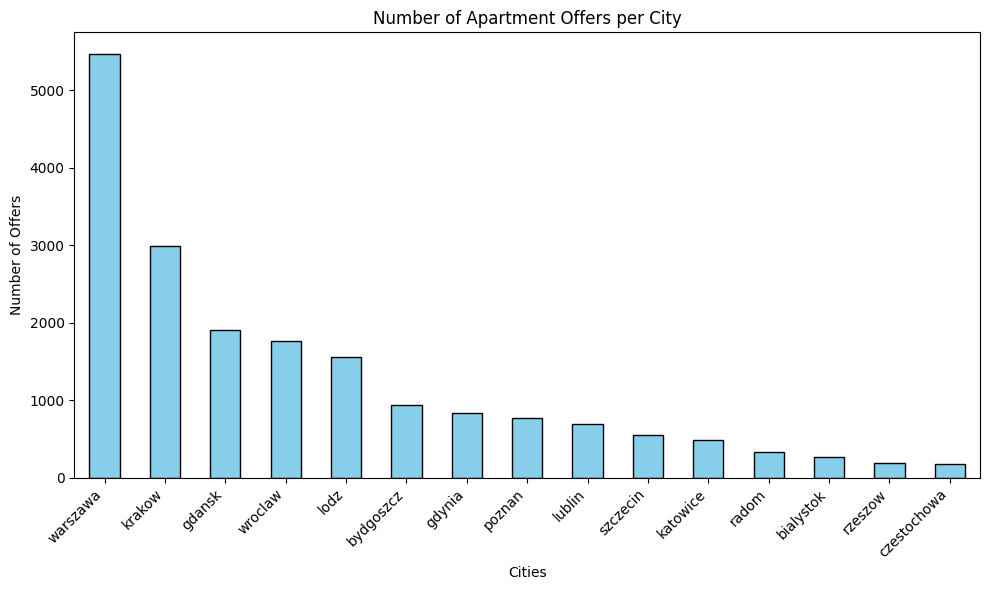

city
warszawa       5471
krakow         2983
gdansk         1898
wroclaw        1768
lodz           1555
bydgoszcz       941
gdynia          830
poznan          773
lublin          691
szczecin        552
katowice        488
radom           324
bialystok       262
rzeszow         194
czestochowa     175
Name: count, dtype: int64


In [88]:
city_counts = df["city"].value_counts()

plt.figure(figsize=(10,6))
city_counts.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Cities")
plt.ylabel("Number of Offers")
plt.title("Number of Apartment Offers per City")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
print(city_counts)

In [99]:
# Create a new DataFrame with only City Specific listings
df_wroclaw = df[df["city"] == "wroclaw"].copy()

# Quick check
print(df_wroclaw.head())
print(f"Number of listings in Wroclaw: {len(df_wroclaw)}")


                                    id     city               type  \
7298  4b0755e783f07b956ad64a4ae5d81207  wroclaw       blockOfFlats   
7299  41f4c245c3b0e75ad13cda53f6a2ff34  wroclaw                NaN   
7300  17c055aad0ea52ed2889b027914c6a37  wroclaw           tenement   
7301  0c7bcb98fb91ec7bb341fd810a3ff3e6  wroclaw       blockOfFlats   
7302  d6e335c886ec2f32c7982fec83515982  wroclaw  apartmentBuilding   

      squareMeters  rooms  floor  floorCount  buildYear   latitude  longitude  \
7298         71.60    3.0    6.0         7.0     2008.0  51.123690  16.989237   
7299         38.50    2.0    4.0         9.0     2022.0  51.109715  17.014937   
7300         58.00    2.0    1.0         4.0     1900.0  51.120041  17.033885   
7301         52.00    3.0    2.0         4.0        NaN  51.085792  17.041309   
7302         60.59    3.0    1.0         5.0     2023.0  51.058333  17.061389   

      ...  pharmacyDistance    ownership  buildingMaterial  condition  \
7298  ...          

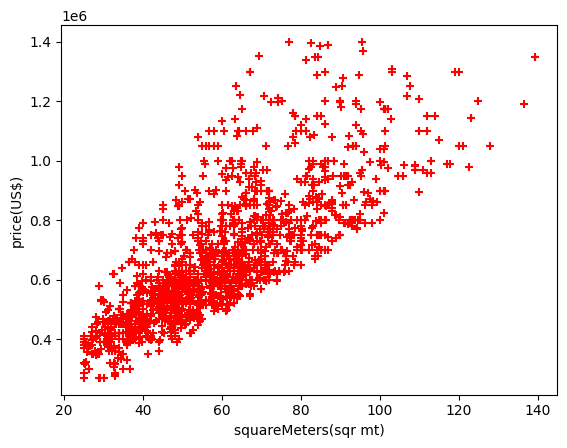

In [102]:
%matplotlib inline 
plt.xlabel('squareMeters(sqr mt)') 
plt.ylabel('price(US$)') 
plt.scatter(df_wroclaw.squareMeters,df_wroclaw.price, color='red',marker='+')

In [104]:
reg = linear_model.LinearRegression()
reg.fit(df_wroclaw[['squareMeters']], df_wroclaw['price'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [105]:
reg.predict([[100]])

C:\Users\Mamta Agrawal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1015657.94979334])

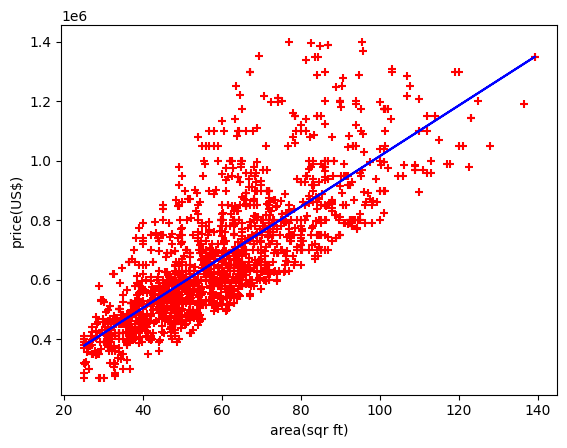

In [109]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df_wroclaw.squareMeters,df_wroclaw.price, color='red',marker='+')
plt.plot(df_wroclaw.squareMeters,reg.predict(df_wroclaw[['squareMeters']]),color='blue')

##Scaling and Merging the files

In [ ]:
from glob import glob

# example: load all CSVs from a folder
all_files = glob("data/*.csv")  # adjust path
df_list = [pd.read_csv(f) for f in all_files]

# combine into one big DataFrame
full_df = pd.concat(df_list, ignore_index=True)

In [122]:
from glob import glob

# example: load all CSVs from a folder
all_files = glob("C:/Users/Mamta Agrawal/Desktop/Python/archive/*.csv")
df_list = [pd.read_csv(f) for f in all_files]

# combine into one big DataFrame
full_df = pd.concat(df_list, ignore_index=True)
full_df

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266410,4018cc5a9fd48bb2d66b84bc5e1b46ab,bydgoszcz,tenement,55.00,3.0,2.0,2.0,NaN,53.129551,18.029431,...,0.024,condominium,brick,NaN,no,no,no,no,no,3200
266411,89fdf9ecda6fe6aa95e34528fa82f55f,bydgoszcz,blockOfFlats,48.00,2.0,3.0,3.0,2019.0,53.121200,17.992500,...,0.300,condominium,brick,NaN,no,no,no,no,no,2700
266412,095b187d0bbce092d4b03164e89710c5,bydgoszcz,blockOfFlats,50.00,2.0,1.0,3.0,2019.0,53.121200,17.992500,...,0.300,condominium,brick,NaN,no,yes,no,no,no,2800
266413,eee39c309b4f55e057485d848bb2772b,bydgoszcz,NaN,40.00,2.0,1.0,1.0,NaN,53.126000,18.007900,...,0.205,condominium,NaN,NaN,no,no,NaN,no,no,1500


##Simplifying for cities, to conduct similar analyses

In [126]:
# Create a new DataFrame with only City Specific listings
df_wroclaw_global = full_df[full_df["city"] == "wroclaw"].copy()

# Quick check
print(df_wroclaw_global.head())
print(f"Number of listings in Wroclaw: {len(df_wroclaw_global)}")

                                    id     city               type  \
7298  4b0755e783f07b956ad64a4ae5d81207  wroclaw       blockOfFlats   
7299  41f4c245c3b0e75ad13cda53f6a2ff34  wroclaw                NaN   
7300  17c055aad0ea52ed2889b027914c6a37  wroclaw           tenement   
7301  0c7bcb98fb91ec7bb341fd810a3ff3e6  wroclaw       blockOfFlats   
7302  d6e335c886ec2f32c7982fec83515982  wroclaw  apartmentBuilding   

      squareMeters  rooms  floor  floorCount  buildYear   latitude  longitude  \
7298         71.60    3.0    6.0         7.0     2008.0  51.123690  16.989237   
7299         38.50    2.0    4.0         9.0     2022.0  51.109715  17.014937   
7300         58.00    2.0    1.0         4.0     1900.0  51.120041  17.033885   
7301         52.00    3.0    2.0         4.0        NaN  51.085792  17.041309   
7302         60.59    3.0    1.0         5.0     2023.0  51.058333  17.061389   

      ...  pharmacyDistance    ownership  buildingMaterial  condition  \
7298  ...          

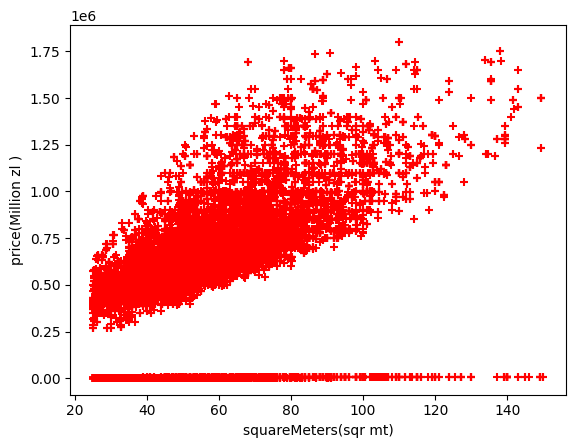

In [128]:
%matplotlib inline 
plt.xlabel('squareMeters(sqr mt)') 
plt.ylabel('price(Million zl )') 
plt.scatter(df_wroclaw_global.squareMeters,df_wroclaw_global.price, color='red',marker='+')

##Filter for non zero values or drop zero values. Find zero values count, and then drop them

#Finish the analytical part, check the top 5 most expensive for each city